In [1]:
import scipy.io as sio
import pandas as pd
import numpy as np
from tqdm import tnrange, tqdm_notebook
from sklearn.preprocessing import maxabs_scale, minmax_scale
from sklearn.model_selection import train_test_split, KFold
from sklearn.decomposition import PCA

from matplotlib import pyplot as plt
import seaborn as sns
import time, warnings\

from SVR_monoKernel import *
warnings.filterwarnings('ignore')
sns.set(style='whitegrid',palette='cividis')

In [2]:
# # Normalized
# rdata = sio.loadmat('D:/ML/data/Data_normalized/rData.mat')['rData_all'].T
# cdata = sio.loadmat('D:/ML/data/Data_normalized/cData.mat')['cData_all'].T
# xdata = sio.loadmat('D:/ML/data/Data_normalized/xData.mat')['xData_all'].T
# pdata = sio.loadmat('D:/ML/data/Data_normalized/pData.mat')['pData_all'].T
# # Original
# # rdata = sio.loadmat('D:/ML/data/Data_original/rData.mat')['rData_all'].T
# cdata_raw = sio.loadmat('D:/ML/data/Data_original/cData.mat')['cData_all'].T
# # xdata = sio.loadmat('D:/ML/data/Data_original/xData.mat')['xData_all'].T
# # pdata = sio.loadmat('D:/ML/data/Data_original/pData.mat')['pData_all'].T
# cdata.shape

In [3]:
# No V0
rdata = sio.loadmat('Data_noV0/rData.mat')['rData_all'].T
cdata = sio.loadmat('Data_noV0/cData.mat')['cData_all'].T
xdata = sio.loadmat('Data_noV0/xData.mat')['xData_all'].T
pdata = sio.loadmat('Data_noV0/pData.mat')['pData_all'].T

In [4]:
# Labels No V0
pos = sio.loadmat('Data_noV0/posPANSS.mat')['pos_all'].T
neg = sio.loadmat('Data_noV0/negPANSS.mat')['neg_all'].T
gen = sio.loadmat('Data_noV0/genPANSS.mat')['gen_all'].T
tot = sio.loadmat('Data_noV0/totPANSS.mat')['tot_all'].T
score = np.hstack((pos,neg,gen,tot))
score.shape

(141, 4)

In [5]:
rdata_maxabs = maxabs_scale(rdata,axis=0)
# tot_maxabs = maxabs_scale(tot,axis=0)
# tot_minmax = minmax_scale(tot,axis=0)

## Data Observation
### Correlation

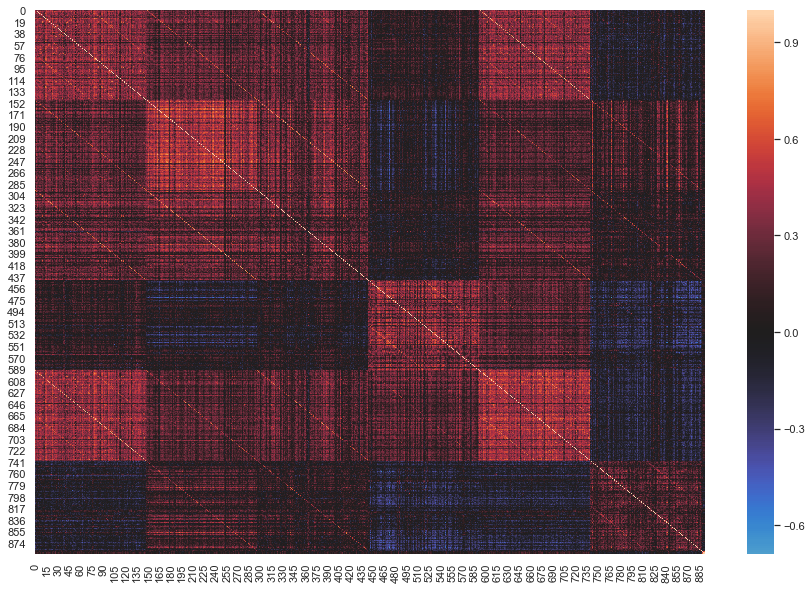

In [6]:
r_corr = pd.DataFrame(data=np.hstack((rdata,score))).corr()
plt.figure(figsize=(15,10))
ax = sns.heatmap(r_corr.loc[0:6669,0:6669],center=0)
plt.show()

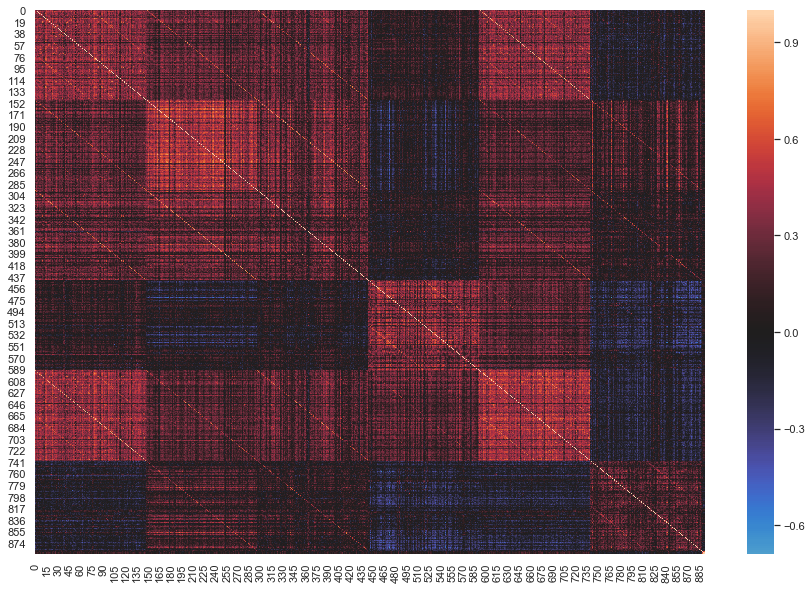

In [7]:
r_corr = pd.DataFrame(data=np.hstack((rdata_maxabs,score))).corr()
plt.figure(figsize=(15,10))
ax = sns.heatmap(r_corr.loc[0:6669,0:6669],center=0)
plt.show()

**Mean Values across every 50 features**

In [8]:
def mean_features(data, stepsize):
    tmp1 = []
    length = data.shape[1]
    num  = int(length/stepsize)
    for i in range(0,num):
        mean = np.mean(data[:,i*stepsize:(i+1)*stepsize-1],
                       axis=1)
        tmp1.append(mean)
    tmp = np.array(tmp1).reshape(num,141).T
    return tmp

rdata_m = mean_features(rdata_maxabs, 50)
pd.DataFrame(rdata_m).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,0.677365,0.634810,0.647037,0.405070,0.424018,0.423233,0.415304,0.449613,0.461119,0.833202,0.830999,0.808262,0.628009,0.628761,0.661036,0.784076,0.793342
std,0.069968,0.072381,0.071795,0.093627,0.093468,0.087398,0.060817,0.061872,0.049711,0.034755,0.032238,0.035594,0.078284,0.080978,0.062641,0.030685,0.027264
min,0.487070,0.406428,0.433075,0.247981,0.261412,0.269291,0.264781,0.297104,0.355846,0.744102,0.734532,0.711877,0.420789,0.408841,0.497944,0.721765,0.739931
25%,0.628340,0.588538,0.602570,0.336488,0.355922,0.359302,0.368987,0.405692,0.422413,0.809569,0.814266,0.791612,0.571693,0.570250,0.619289,0.763072,0.774525
50%,0.679882,0.639887,0.648511,0.395961,0.411179,0.415118,0.408970,0.447774,0.459056,0.835408,0.830654,0.806990,0.633257,0.630084,0.662880,0.780946,0.792539
75%,0.726217,0.676405,0.692179,0.456536,0.472186,0.475149,0.450982,0.491037,0.493058,0.857236,0.851661,0.833387,0.683518,0.683288,0.703502,0.800175,0.808181
max,0.855075,0.810365,0.828935,0.684996,0.705401,0.663589,0.627197,0.642469,0.618766,0.932868,0.904351,0.894703,0.808694,0.795290,0.805013,0.920152,0.903353


### Distribution

(141,)

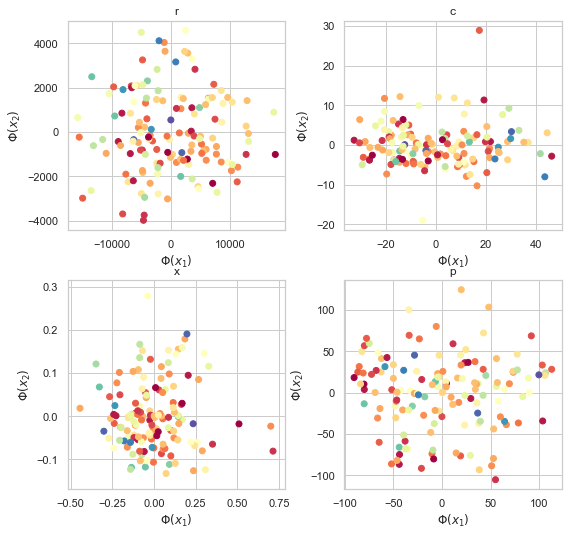

In [9]:
pca = PCA(n_components=2)
a = pca.fit_transform(rdata)
plt.figure(figsize=(8,7))
plt.subplot(2,2,1)
plt.title('r')
plt.scatter(a[:,0],a[:,1],c=np.ravel(pos),cmap='Spectral')
plt.xlabel('$\Phi(x_1)$')
plt.ylabel('$\Phi(x_2)$')

b = pca.fit_transform(cdata)
plt.subplot(2,2,2)
plt.title('c')
plt.scatter(b[:,0],b[:,1],c=np.ravel(pos),cmap='Spectral')
plt.xlabel('$\Phi(x_1)$')
plt.ylabel('$\Phi(x_2)$')
plt.tight_layout()

c = pca.fit_transform(xdata)
plt.subplot(2,2,3)
plt.title('x')
plt.scatter(c[:,0],c[:,1],c=np.ravel(pos),cmap='Spectral')
plt.xlabel('$\Phi(x_1)$')
plt.ylabel('$\Phi(x_2)$')
plt.subplot(2,2,4)

d = pca.fit_transform(pdata)
plt.title('p')
plt.scatter(d[:,0],d[:,1],c=np.ravel(pos),cmap='Spectral')
plt.xlabel('$\Phi(x_1)$')
plt.ylabel('$\Phi(x_2)$')
np.ravel(pos).shape

## Feature Selection (A): From Models
**Models**
- Lasso:
$$\frac{1}{2n_{samples}}\|\mathbf{y} - \mathbf{Xw}\|^2_2 + \alpha\|\mathbf{w}\|_1$$

- Elastic Net:
$$1 / (2 * n_samples) * ||y - Xw||^2_2
+ alpha * l1_ratio * ||w||_1
+ 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2$$

|Algorithm|Description|
|--|--|
|Coordinate Descent (LassoCD)|null|
|Least Angle Regression (LassoLARS)|null|
|Information Criterion Based LARS (LassoLARSIC)|AIC/BIC|
|Elastic Net|null|

**Results**

|PANSS|alpha|R|
|--|--|--|
|Positive|0.05|0.12|
|Negative|||
|General|||
|Total|||

In [45]:
X = rdata_maxabs
y = tot
ll = 1e-2
ul = 4e-1
step = 100
weight = [15,14,14,14,14,14,14,14,14,14]
state = 5

In [1]:
df1, df2, df3 = lassoCD(X, y, ll, ul, step, weight, state)

NameError: name 'lassoCD' is not defined

In [6]:
X = rdata_maxabs
y = tot
lower_n_features = round(0.7 * X.shape[1]) 
upper_n_features = round(0.8 * X.shape[1])
weight = [15,14,14,14,14,14,14,14,14,14]
state = 5

In [7]:
pred, true, r2, mse, mat, feature = rfe_(X, y, lower_n_features, upper_n_features, weight, state)

IndexError: too many indices for array